# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *
from nnAuto import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
'''encoder=[]
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=2,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=4,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
decoder=[]
decoder.append(dict(type="Relu",size=49*4))
decoder.append(dict(type="Reshape",shape=[-1,7,7,4]))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=2,relu=True))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))'''
#decoder.append(dict(type="Sigmoid_Feature"))
encoder=[]
encoder.append(dict(type="Relu",size=512))
encoder.append(dict(type="Relu",size=256))
decoder=[]
decoder.append(dict(type="Relu",size=256))
decoder.append(dict(type="Relu",size=512))
decoder.append(dict(type="Linear",size=784))
decoder.append(dict(type="Reshape",shape=[-1,28,28,1]))



autoencoder=Layer(x=data,type="Variational_Autoencoder",encoder=encoder,decoder=decoder,binary_decoder=True,
                  encoder_mean=dict(type="Linear",size=2))
autoencoder_eval=autoencoder.copy(x=data,test=True)
autoencoder_test=autoencoder.copy(x=data_test,test=True)

trainer=LabeledTrainer(network=autoencoder,optimizer="adam",loss="network")
tester_eval=LabeledTrainer(network=autoencoder_eval,loss="network",test=True)
tester=LabeledTrainer(network=autoencoder_test,loss="network",test=True)

#trainer_start=LabeledTrainer(network=autoencoder,optimizer="adam",loss="mean_squared_error")

sess=SessManager()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


1.09836
1.07842


<IPython.core.display.Javascript object>


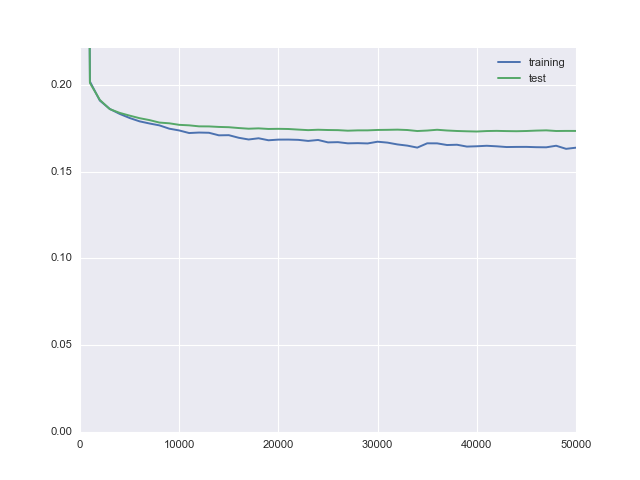

0.201971
0.2012


0.19102
0.191397


0.186206
0.186113


0.183343
0.183929


0.180986
0.18235


0.179058
0.180876


0.17782
0.179775


0.176736
0.178346


0.174818
0.17792


0.173802
0.177033


0.17231
0.176748


0.17259
0.176164


0.172463
0.176125


0.170991
0.175829


0.171079
0.175667


0.169579
0.17519


0.168591
0.174803


0.169292
0.175003


0.16814
0.174661


0.168517
0.174736


0.168542
0.174638


0.168382
0.174296


0.167759
0.17398


0.168314
0.174208


0.166922
0.174048


0.167055
0.173975


0.166374
0.173656


0.166484
0.173843


0.166315
0.173855


0.16731
0.174088


0.166785
0.174154


0.165744
0.174263


0.165054
0.174049


0.163914
0.173464


0.166386
0.173743


0.166362
0.174194


0.165403
0.173769


0.165566
0.17349


0.164505
0.173315


0.164685
0.173185


0.164969
0.173459


0.164662
0.173555


0.164239
0.173434


0.164309
0.173359


0.164329
0.173483


0.164149
0.173711


0.164086
0.173858


0.164988
0.173479


0.163201
0.173533


0.163869
0.173521


In [3]:
batches_per_step=1000#60000//128 #About 1 epoch
batches_per_eval=100
n_steps=50
#trainer_start.train(1000,learn_rate=1e-3)
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot#,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    #eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    #eval_plot.set_xdata(x)
    #eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,tests[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval)]
    #evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss()]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-3)
    trains.append(trainer.eval_loss(n=batches_per_eval)) 
    #evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss())
    show(-sess.run(autoencoder.zd)[0,:,:,0])
    show(-autoencoder.generate()[0,:,:,0])
    update_plt()

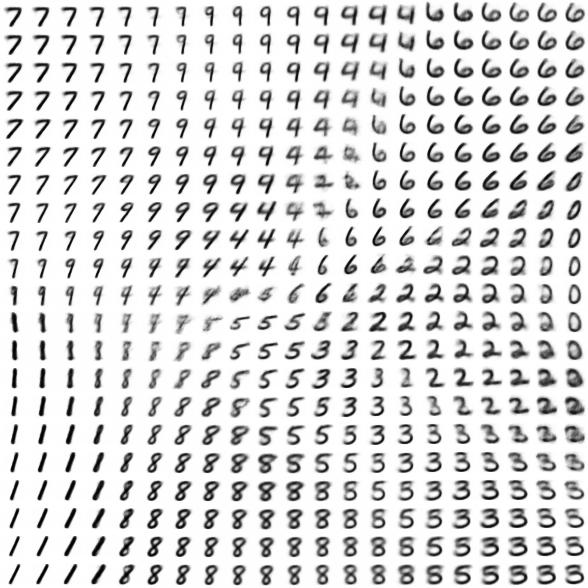

In [4]:
p=10
step=0.1
x=[[step*n,step*m] for n in range(-p,p+1) for m in range(-p,p+1)]
y=autoencoder.decode(x).reshape(2*p+1,2*p+1,28,28)
show(-composite(y))